In [1]:
import h5py
import os

import fenics as fe
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

import sys
sys.path.insert(0, "../scripts/")

from ns_2d import NSSemiImplicit, NSSplit

fe.set_log_level(40)

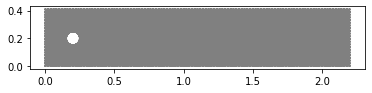

In [2]:
mesh = "../mesh/featflow-2d-3-benchmark.xdmf"
ns = NSSemiImplicit(mesh, dict(dt=1/1000))
ns.setup_form()

ns_split = NSSplit(mesh, dict(dt=1/1000))
ns_split.setup_form()
ns_split.solve()

assert ns.t == ns_split.t

fe.plot(ns.mesh)
plt.show()

ns.setup_form()

In [3]:
t_final = 0.2
nt = int((t_final - ns.t) / ns.dt)
for i in tqdm(range(nt)):
    ns.solve()
    ns_split.solve()

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 198/198 [01:50<00:00,  1.78it/s]


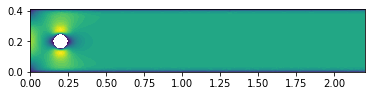

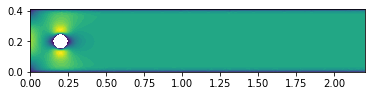

0.00038631238681266185


In [4]:
u, p = fe.split(ns.du)
u, v = fe.split(u)

fe.plot(u)
plt.show()

fe.plot(fe.split(ns_split.u)[0])
plt.show()

print(fe.errornorm(ns.du.split()[0], ns_split.u))

In [ ]:
# re-initialize and run through again
ns = NSSemiImplicit(mesh, dict(dt=1/1000))
ns.setup_form()

ns_split = NSSplit(mesh, dict(dt=1/1000))
ns_split.setup_form()
ns_split.solve()

nt = int((0.2 - ns.t) / ns.dt)
for i in tqdm(range(nt)):
    ns.solve(krylov=True)
    ns_split.solve(krylov=True)

  1%|▋                                                                                                                                                    | 1/199 [00:03<12:48,  3.88s/it]

  0 KSP preconditioned resid norm 5.248490987678e+00 true resid norm 9.392566044406e-03 ||r(i)||/||b|| 1.000000000000e+00
  1 KSP preconditioned resid norm 5.053081246224e-02 true resid norm 4.676066374256e-03 ||r(i)||/||b|| 4.978475905464e-01
  2 KSP preconditioned resid norm 6.510741985341e-03 true resid norm 2.086306188828e-05 ||r(i)||/||b|| 2.221231321626e-03
  3 KSP preconditioned resid norm 3.469479017558e-05 true resid norm 2.825608870182e-07 ||r(i)||/||b|| 3.008346022613e-05
  4 KSP preconditioned resid norm 1.094073267142e-06 true resid norm 1.651410744899e-08 ||r(i)||/||b|| 1.758210415654e-06
KSP Object: 1 MPI processes
  type: gmres
    restart=30, using Classical (unmodified) Gram-Schmidt Orthogonalization with no iterative refinement
    happy breakdown tolerance 1e-30
  maximum iterations=1000, initial guess is zero
  tolerances:  relative=1e-06, absolute=1e-08, divergence=10000.
  left preconditioning
  using PRECONDITIONED norm type for convergence test
PC Object: 1 MPI

  1%|█▍                                                                                                                                                   | 2/199 [00:06<10:50,  3.30s/it]

  type: preonly
                maximum iterations=10000, initial guess is zero
                tolerances:  relative=1e-05, absolute=1e-50, divergence=10000.
                left preconditioning
                using NONE norm type for convergence test
              PC Object: (fieldsplit_0_) 1 MPI processes
                type: hypre
                  HYPRE BoomerAMG preconditioning
                    Cycle type V
                    Maximum number of levels 25
                    Maximum number of iterations PER hypre call 1
                    Convergence tolerance PER hypre call 0.
                    Threshold for strong coupling 0.25
                    Interpolation truncation factor 0.
                    Interpolation: max elements per row 0
                    Number of levels of aggressive coarsening 0
                    Number of paths for aggressive coarsening 1
                    Maximum row sums 0.9
                    Sweeps down         1
                    Sweep

  2%|██▏                                                                                                                                                  | 3/199 [00:10<11:33,  3.54s/it]

e: schurcomplement
          rows=3889, cols=3889
            Schur complement A11 - A10 inv(A00) A01
            A11
              Mat Object: (fieldsplit_1_) 1 MPI processes
                type: seqaij
                rows=3889, cols=3889
                total: nonzeros=26539, allocated nonzeros=26539
                total number of mallocs used during MatSetValues calls=0
                  not using I-node routines
            A10
              Mat Object: 1 MPI processes
                type: seqaij
                rows=3889, cols=30428
                total: nonzeros=142994, allocated nonzeros=142994
                total number of mallocs used during MatSetValues calls=0
                  not using I-node routines
            KSP of A00
              KSP Object: (fieldsplit_0_) 1 MPI processes
                type: preonly
                maximum iterations=10000, initial guess is zero
                tolerances:  relative=1e-05, absolute=1e-50, divergence=10000.
               

  2%|██▉                                                                                                                                                  | 4/199 [00:13<11:05,  3.41s/it]

d nonzeros=142994
                total number of mallocs used during MatSetValues calls=0
                  not using I-node routines
        Mat Object: 1 MPI processes
          type: seqaij
          rows=3889, cols=3889
          total: nonzeros=71023, allocated nonzeros=71023
          total number of mallocs used during MatSetValues calls=0
            not using I-node routines
  linear system matrix = precond matrix:
  Mat Object: 1 MPI processes
    type: seqaij
    rows=34317, cols=34317
    total: nonzeros=1002111, allocated nonzeros=1002111
    total number of mallocs used during MatSetValues calls=0
      not using I-node routines
  0 KSP preconditioned resid norm 1.050986924149e+01 true resid norm 1.878389892098e-02 ||r(i)||/||b|| 1.000000000000e+00
  1 KSP preconditioned resid norm 1.001430963505e-01 true resid norm 9.348946601213e-03 ||r(i)||/||b|| 4.977106531792e-01
  2 KSP preconditioned resid norm 1.302125581937e-02 true resid norm 8.132999935638e-05 ||r(i)||/||b|| 4

  3%|███▋                                                                                                                                                 | 5/199 [00:17<11:17,  3.49s/it]

ditioning
        using PRECONDITIONED norm type for convergence test
      PC Object: (fieldsplit_1_) 1 MPI processes
        type: ilu
          out-of-place factorization
          0 levels of fill
          tolerance for zero pivot 2.22045e-14
          matrix ordering: natural
          factor fill ratio given 1., needed 1.
            Factored matrix follows:
              Mat Object: 1 MPI processes
                type: seqaij
                rows=3889, cols=3889
                package used to perform factorization: petsc
                total: nonzeros=71023, allocated nonzeros=71023
                  not using I-node routines
        linear system matrix followed by preconditioner matrix:
        Mat Object: (fieldsplit_1_) 1 MPI processes
          type: schurcomplement
          rows=3889, cols=3889
            Schur complement A11 - A10 inv(A00) A01
            A11
              Mat Object: (fieldsplit_1_) 1 MPI processes
                type: seqaij
                rows=

  3%|████▍                                                                                                                                                | 6/199 [00:21<11:40,  3.63s/it]

ioning
        using NONE norm type for convergence test
      PC Object: (fieldsplit_0_) 1 MPI processes
        type: hypre
          HYPRE BoomerAMG preconditioning
            Cycle type V
            Maximum number of levels 25
            Maximum number of iterations PER hypre call 1
            Convergence tolerance PER hypre call 0.
            Threshold for strong coupling 0.25
            Interpolation truncation factor 0.
            Interpolation: max elements per row 0
            Number of levels of aggressive coarsening 0
            Number of paths for aggressive coarsening 1
            Maximum row sums 0.9
            Sweeps down         1
            Sweeps up           1
            Sweeps on coarse    1
            Relax down          symmetric-SOR/Jacobi
            Relax up            symmetric-SOR/Jacobi
            Relax on coarse     Gaussian-elimination
            Relax weight  (all)      1.
            Outer relax weight (all) 1.
            Using CF-relaxa

  4%|█████▏                                                                                                                                               | 7/199 [00:25<11:42,  3.66s/it]

tion
            Not using more complex smoothers.
            Measure type        local
            Coarsen type        Falgout
            Interpolation type  classical
            SpGEMM type         cusparse
        linear system matrix = precond matrix:
        Mat Object: (fieldsplit_0_) 1 MPI processes
          type: seqaij
          rows=30428, cols=30428
          total: nonzeros=689584, allocated nonzeros=689584
          total number of mallocs used during MatSetValues calls=0
            not using I-node routines
    KSP solver for S = A11 - A10 inv(A00) A01 
      KSP Object: (fieldsplit_1_) 1 MPI processes
        type: gmres
          restart=30, using Classical (unmodified) Gram-Schmidt Orthogonalization with no iterative refinement
          happy breakdown tolerance 1e-30
        maximum iterations=10000, initial guess is zero
        tolerances:  relative=1e-05, absolute=1e-50, divergence=10000.
        left preconditioning
        using PRECONDITIONED norm type for

  4%|█████▉                                                                                                                                               | 8/199 [00:28<11:48,  3.71s/it]

mber of mallocs used during MatSetValues calls=0
                  not using I-node routines
            A10
              Mat Object: 1 MPI processes
                type: seqaij
                rows=3889, cols=30428
                total: nonzeros=142994, allocated nonzeros=142994
                total number of mallocs used during MatSetValues calls=0
                  not using I-node routines
            KSP of A00
              KSP Object: (fieldsplit_0_) 1 MPI processes
                type: preonly
                maximum iterations=10000, initial guess is zero
                tolerances:  relative=1e-05, absolute=1e-50, divergence=10000.
                left preconditioning
                using NONE norm type for convergence test
              PC Object: (fieldsplit_0_) 1 MPI processes
                type: hypre
                  HYPRE BoomerAMG preconditioning
                    Cycle type V
                    Maximum number of levels 25
                    Maximum number

  5%|██████▋                                                                                                                                              | 9/199 [00:32<11:53,  3.76s/it]

s
        type: hypre
          HYPRE BoomerAMG preconditioning
            Cycle type V
            Maximum number of levels 25
            Maximum number of iterations PER hypre call 1
            Convergence tolerance PER hypre call 0.
            Threshold for strong coupling 0.25
            Interpolation truncation factor 0.
            Interpolation: max elements per row 0
            Number of levels of aggressive coarsening 0
            Number of paths for aggressive coarsening 1
            Maximum row sums 0.9
            Sweeps down         1
            Sweeps up           1
            Sweeps on coarse    1
            Relax down          symmetric-SOR/Jacobi
            Relax up            symmetric-SOR/Jacobi
            Relax on coarse     Gaussian-elimination
            Relax weight  (all)      1.
            Outer relax weight (all) 1.
            Using CF-relaxation
            Not using more complex smoothers.
            Measure type        local
            Coa

  5%|███████▍                                                                                                                                            | 10/199 [00:36<12:02,  3.82s/it]

tines
  linear system matrix = precond matrix:
  Mat Object: 1 MPI processes
    type: seqaij
    rows=34317, cols=34317
    total: nonzeros=1002111, allocated nonzeros=1002111
    total number of mallocs used during MatSetValues calls=0
      not using I-node routines
  0 KSP preconditioned resid norm 9.843766661188e+01 true resid norm 3.929109282928e-02 ||r(i)||/||b|| 1.000000000000e+00
  1 KSP preconditioned resid norm 2.004622549987e-01 true resid norm 8.051197005015e-03 ||r(i)||/||b|| 2.049115060250e-01
  2 KSP preconditioned resid norm 1.510684552404e-02 true resid norm 1.158020097892e-03 ||r(i)||/||b|| 2.947284014022e-02
  3 KSP preconditioned resid norm 1.554499858452e-04 true resid norm 2.870139248012e-06 ||r(i)||/||b|| 7.304808905375e-05
  4 KSP preconditioned resid norm 4.772654520400e-06 true resid norm 1.535432499673e-06 ||r(i)||/||b|| 3.907838619670e-05
KSP Object: 1 MPI processes
  type: gmres
    restart=30, using Classical (unmodified) Gram-Schmidt Orthogonalization wi

  6%|████████▏                                                                                                                                           | 11/199 [00:40<12:01,  3.84s/it]

 A10
              Mat Object: 1 MPI processes
                type: seqaij
                rows=3889, cols=30428
                total: nonzeros=142994, allocated nonzeros=142994
                total number of mallocs used during MatSetValues calls=0
                  not using I-node routines
            KSP of A00
              KSP Object: (fieldsplit_0_) 1 MPI processes
                type: preonly
                maximum iterations=10000, initial guess is zero
                tolerances:  relative=1e-05, absolute=1e-50, divergence=10000.
                left preconditioning
                using NONE norm type for convergence test
              PC Object: (fieldsplit_0_) 1 MPI processes
                type: hypre
                  HYPRE BoomerAMG preconditioning
                    Cycle type V
                    Maximum number of levels 25
                    Maximum number of iterations PER hypre call 1
                    Convergence tolerance PER hypre call 0.
            

  6%|████████▉                                                                                                                                           | 12/199 [00:44<12:09,  3.90s/it]

           type: seqaij
                rows=3889, cols=30428
                total: nonzeros=142994, allocated nonzeros=142994
                total number of mallocs used during MatSetValues calls=0
                  not using I-node routines
            KSP of A00
              KSP Object: (fieldsplit_0_) 1 MPI processes
                type: preonly
                maximum iterations=10000, initial guess is zero
                tolerances:  relative=1e-05, absolute=1e-50, divergence=10000.
                left preconditioning
                using NONE norm type for convergence test
              PC Object: (fieldsplit_0_) 1 MPI processes
                type: hypre
                  HYPRE BoomerAMG preconditioning
                    Cycle type V
                    Maximum number of levels 25
                    Maximum number of iterations PER hypre call 1
                    Convergence tolerance PER hypre call 0.
                    Threshold for strong coupling 0.25
         

  7%|█████████▋                                                                                                                                          | 13/199 [00:48<11:51,  3.82s/it]

       Mat Object: (fieldsplit_0_) 1 MPI processes
          type: seqaij
          rows=30428, cols=30428
          total: nonzeros=689584, allocated nonzeros=689584
          total number of mallocs used during MatSetValues calls=0
            not using I-node routines
    KSP solver for S = A11 - A10 inv(A00) A01 
      KSP Object: (fieldsplit_1_) 1 MPI processes
        type: gmres
          restart=30, using Classical (unmodified) Gram-Schmidt Orthogonalization with no iterative refinement
          happy breakdown tolerance 1e-30
        maximum iterations=10000, initial guess is zero
        tolerances:  relative=1e-05, absolute=1e-50, divergence=10000.
        left preconditioning
        using PRECONDITIONED norm type for convergence test
      PC Object: (fieldsplit_1_) 1 MPI processes
        type: ilu
          out-of-place factorization
          0 levels of fill
          tolerance for zero pivot 2.22045e-14
          matrix ordering: natural
          factor fill ratio g

  7%|██████████▍                                                                                                                                         | 14/199 [00:52<12:07,  3.93s/it]

ce tolerance PER hypre call 0.
            Threshold for strong coupling 0.25
            Interpolation truncation factor 0.
            Interpolation: max elements per row 0
            Number of levels of aggressive coarsening 0
            Number of paths for aggressive coarsening 1
            Maximum row sums 0.9
            Sweeps down         1
            Sweeps up           1
            Sweeps on coarse    1
            Relax down          symmetric-SOR/Jacobi
            Relax up            symmetric-SOR/Jacobi
            Relax on coarse     Gaussian-elimination
            Relax weight  (all)      1.
            Outer relax weight (all) 1.
            Using CF-relaxation
            Not using more complex smoothers.
            Measure type        local
            Coarsen type        Falgout
            Interpolation type  classical
            SpGEMM type         cusparse
        linear system matrix = precond matrix:
        Mat Object: (fieldsplit_0_) 1 MPI processes
 

  8%|███████████▏                                                                                                                                        | 15/199 [00:55<11:40,  3.81s/it]

seqaij
                  rows=30428, cols=30428
                  total: nonzeros=689584, allocated nonzeros=689584
                  total number of mallocs used during MatSetValues calls=0
                    not using I-node routines
            A01
              Mat Object: 1 MPI processes
                type: seqaij
                rows=30428, cols=3889
                total: nonzeros=142994, allocated nonzeros=142994
                total number of mallocs used during MatSetValues calls=0
                  not using I-node routines
        Mat Object: 1 MPI processes
          type: seqaij
          rows=3889, cols=3889
          total: nonzeros=71023, allocated nonzeros=71023
          total number of mallocs used during MatSetValues calls=0
            not using I-node routines
  linear system matrix = precond matrix:
  Mat Object: 1 MPI processes
    type: seqaij
    rows=34317, cols=34317
    total: nonzeros=1002111, allocated nonzeros=1002111
    total number of mallocs use

  8%|███████████▉                                                                                                                                        | 16/199 [01:00<12:06,  3.97s/it]

 of mallocs used during MatSetValues calls=0
                  not using I-node routines
            KSP of A00
              KSP Object: (fieldsplit_0_) 1 MPI processes
                type: preonly
                maximum iterations=10000, initial guess is zero
                tolerances:  relative=1e-05, absolute=1e-50, divergence=10000.
                left preconditioning
                using NONE norm type for convergence test
              PC Object: (fieldsplit_0_) 1 MPI processes
                type: hypre
                  HYPRE BoomerAMG preconditioning
                    Cycle type V
                    Maximum number of levels 25
                    Maximum number of iterations PER hypre call 1
                    Convergence tolerance PER hypre call 0.
                    Threshold for strong coupling 0.25
                    Interpolation truncation factor 0.
                    Interpolation: max elements per row 0
                    Number of levels of aggressive c

  9%|████████████▋                                                                                                                                       | 17/199 [01:03<11:44,  3.87s/it]

           not using I-node routines
            KSP of A00
              KSP Object: (fieldsplit_0_) 1 MPI processes
                type: preonly
                maximum iterations=10000, initial guess is zero
                tolerances:  relative=1e-05, absolute=1e-50, divergence=10000.
                left preconditioning
                using NONE norm type for convergence test
              PC Object: (fieldsplit_0_) 1 MPI processes
                type: hypre
                  HYPRE BoomerAMG preconditioning
                    Cycle type V
                    Maximum number of levels 25
                    Maximum number of iterations PER hypre call 1
                    Convergence tolerance PER hypre call 0.
                    Threshold for strong coupling 0.25
                    Interpolation truncation factor 0.
                    Interpolation: max elements per row 0
                    Number of levels of aggressive coarsening 0
                    Number of paths for 

  9%|█████████████▍                                                                                                                                      | 18/199 [01:08<12:02,  3.99s/it]

it with Schur preconditioner, blocksize = 1, factorization FULL
    Preconditioner for the Schur complement formed from Sp, an assembled approximation to S, which uses A00's lumped diagonal's inverse
    Split info:
    Split number 0 Defined by IS
    Split number 1 Defined by IS
    KSP solver for A00 block
      KSP Object: (fieldsplit_0_) 1 MPI processes
        type: preonly
        maximum iterations=10000, initial guess is zero
        tolerances:  relative=1e-05, absolute=1e-50, divergence=10000.
        left preconditioning
        using NONE norm type for convergence test
      PC Object: (fieldsplit_0_) 1 MPI processes
        type: hypre
          HYPRE BoomerAMG preconditioning
            Cycle type V
            Maximum number of levels 25
            Maximum number of iterations PER hypre call 1
            Convergence tolerance PER hypre call 0.
            Threshold for strong coupling 0.25
            Interpolation truncation factor 0.
            Interpolation: max 

 10%|██████████████▏                                                                                                                                     | 19/199 [01:12<11:49,  3.94s/it]

23, allocated nonzeros=71023
                  not using I-node routines
        linear system matrix followed by preconditioner matrix:
        Mat Object: (fieldsplit_1_) 1 MPI processes
          type: schurcomplement
          rows=3889, cols=3889
            Schur complement A11 - A10 inv(A00) A01
            A11
              Mat Object: (fieldsplit_1_) 1 MPI processes
                type: seqaij
                rows=3889, cols=3889
                total: nonzeros=26539, allocated nonzeros=26539
                total number of mallocs used during MatSetValues calls=0
                  not using I-node routines
            A10
              Mat Object: 1 MPI processes
                type: seqaij
                rows=3889, cols=30428
                total: nonzeros=142994, allocated nonzeros=142994
                total number of mallocs used during MatSetValues calls=0
                  not using I-node routines
            KSP of A00
              KSP Object: (fieldsplit_0_) 1 

 10%|██████████████▊                                                                                                                                     | 20/199 [01:16<12:03,  4.04s/it]

sing I-node routines
        linear system matrix followed by preconditioner matrix:
        Mat Object: (fieldsplit_1_) 1 MPI processes
          type: schurcomplement
          rows=3889, cols=3889
            Schur complement A11 - A10 inv(A00) A01
            A11
              Mat Object: (fieldsplit_1_) 1 MPI processes
                type: seqaij
                rows=3889, cols=3889
                total: nonzeros=26539, allocated nonzeros=26539
                total number of mallocs used during MatSetValues calls=0
                  not using I-node routines
            A10
              Mat Object: 1 MPI processes
                type: seqaij
                rows=3889, cols=30428
                total: nonzeros=142994, allocated nonzeros=142994
                total number of mallocs used during MatSetValues calls=0
                  not using I-node routines
            KSP of A00
              KSP Object: (fieldsplit_0_) 1 MPI processes
                type: preonly
        

 11%|███████████████▌                                                                                                                                    | 21/199 [01:20<11:49,  3.99s/it]

sses
        type: gmres
          restart=30, using Classical (unmodified) Gram-Schmidt Orthogonalization with no iterative refinement
          happy breakdown tolerance 1e-30
        maximum iterations=10000, initial guess is zero
        tolerances:  relative=1e-05, absolute=1e-50, divergence=10000.
        left preconditioning
        using PRECONDITIONED norm type for convergence test
      PC Object: (fieldsplit_1_) 1 MPI processes
        type: ilu
          out-of-place factorization
          0 levels of fill
          tolerance for zero pivot 2.22045e-14
          matrix ordering: natural
          factor fill ratio given 1., needed 1.
            Factored matrix follows:
              Mat Object: 1 MPI processes
                type: seqaij
                rows=3889, cols=3889
                package used to perform factorization: petsc
                total: nonzeros=71023, allocated nonzeros=71023
                  not using I-node routines
        linear system matrix fo

 11%|████████████████▎                                                                                                                                   | 22/199 [01:24<11:59,  4.06s/it]

ype: seqaij
                rows=30428, cols=3889
                total: nonzeros=142994, allocated nonzeros=142994
                total number of mallocs used during MatSetValues calls=0
                  not using I-node routines
        Mat Object: 1 MPI processes
          type: seqaij
          rows=3889, cols=3889
          total: nonzeros=71023, allocated nonzeros=71023
          total number of mallocs used during MatSetValues calls=0
            not using I-node routines
  linear system matrix = precond matrix:
  Mat Object: 1 MPI processes
    type: seqaij
    rows=34317, cols=34317
    total: nonzeros=1002111, allocated nonzeros=1002111
    total number of mallocs used during MatSetValues calls=0
      not using I-node routines
  0 KSP preconditioned resid norm 1.246707048830e+02 true resid norm 8.623763604593e-02 ||r(i)||/||b|| 1.000000000000e+00
  1 KSP preconditioned resid norm 3.764607010078e-01 true resid norm 2.520091179493e-02 ||r(i)||/||b|| 2.922263752860e-01
  2 KS

 12%|█████████████████                                                                                                                                   | 23/199 [01:28<11:41,  3.98s/it]

olute=1e-50, divergence=10000.
                left preconditioning
                using NONE norm type for convergence test
              PC Object: (fieldsplit_0_) 1 MPI processes
                type: hypre
                  HYPRE BoomerAMG preconditioning
                    Cycle type V
                    Maximum number of levels 25
                    Maximum number of iterations PER hypre call 1
                    Convergence tolerance PER hypre call 0.
                    Threshold for strong coupling 0.25
                    Interpolation truncation factor 0.
                    Interpolation: max elements per row 0
                    Number of levels of aggressive coarsening 0
                    Number of paths for aggressive coarsening 1
                    Maximum row sums 0.9
                    Sweeps down         1
                    Sweeps up           1
                    Sweeps on coarse    1
                    Relax down          symmetric-SOR/Jacobi
        

 12%|█████████████████▊                                                                                                                                  | 24/199 [01:32<11:54,  4.08s/it]

preconditioning
                using NONE norm type for convergence test
              PC Object: (fieldsplit_0_) 1 MPI processes
                type: hypre
                  HYPRE BoomerAMG preconditioning
                    Cycle type V
                    Maximum number of levels 25
                    Maximum number of iterations PER hypre call 1
                    Convergence tolerance PER hypre call 0.
                    Threshold for strong coupling 0.25
                    Interpolation truncation factor 0.
                    Interpolation: max elements per row 0
                    Number of levels of aggressive coarsening 0
                    Number of paths for aggressive coarsening 1
                    Maximum row sums 0.9
                    Sweeps down         1
                    Sweeps up           1
                    Sweeps on coarse    1
                    Relax down          symmetric-SOR/Jacobi
                    Relax up            symmetric-SOR/Jacobi

 13%|██████████████████▌                                                                                                                                 | 25/199 [01:36<11:40,  4.02s/it]

 for convergence test
              PC Object: (fieldsplit_0_) 1 MPI processes
                type: hypre
                  HYPRE BoomerAMG preconditioning
                    Cycle type V
                    Maximum number of levels 25
                    Maximum number of iterations PER hypre call 1
                    Convergence tolerance PER hypre call 0.
                    Threshold for strong coupling 0.25
                    Interpolation truncation factor 0.
                    Interpolation: max elements per row 0
                    Number of levels of aggressive coarsening 0
                    Number of paths for aggressive coarsening 1
                    Maximum row sums 0.9
                    Sweeps down         1
                    Sweeps up           1
                    Sweeps on coarse    1
                    Relax down          symmetric-SOR/Jacobi
                    Relax up            symmetric-SOR/Jacobi
                    Relax on coarse     Gaussian-el

 13%|███████████████████▎                                                                                                                                | 26/199 [01:40<11:50,  4.11s/it]

00, initial guess is zero
        tolerances:  relative=1e-05, absolute=1e-50, divergence=10000.
        left preconditioning
        using PRECONDITIONED norm type for convergence test
      PC Object: (fieldsplit_1_) 1 MPI processes
        type: ilu
          out-of-place factorization
          0 levels of fill
          tolerance for zero pivot 2.22045e-14
          matrix ordering: natural
          factor fill ratio given 1., needed 1.
            Factored matrix follows:
              Mat Object: 1 MPI processes
                type: seqaij
                rows=3889, cols=3889
                package used to perform factorization: petsc
                total: nonzeros=71023, allocated nonzeros=71023
                  not using I-node routines
        linear system matrix followed by preconditioner matrix:
        Mat Object: (fieldsplit_1_) 1 MPI processes
          type: schurcomplement
          rows=3889, cols=3889
            Schur complement A11 - A10 inv(A00) A01
        

 14%|████████████████████                                                                                                                                | 27/199 [01:44<11:39,  4.07s/it]

.
                    Using CF-relaxation
                    Not using more complex smoothers.
                    Measure type        local
                    Coarsen type        Falgout
                    Interpolation type  classical
                    SpGEMM type         cusparse
                linear system matrix = precond matrix:
                Mat Object: (fieldsplit_0_) 1 MPI processes
                  type: seqaij
                  rows=30428, cols=30428
                  total: nonzeros=689584, allocated nonzeros=689584
                  total number of mallocs used during MatSetValues calls=0
                    not using I-node routines
            A01
              Mat Object: 1 MPI processes
                type: seqaij
                rows=30428, cols=3889
                total: nonzeros=142994, allocated nonzeros=142994
                total number of mallocs used during MatSetValues calls=0
                  not using I-node routines
        Mat Object: 1 MPI p

 14%|████████████████████▊                                                                                                                               | 28/199 [01:49<11:54,  4.18s/it]

         Outer relax weight (all) 1.
            Using CF-relaxation
            Not using more complex smoothers.
            Measure type        local
            Coarsen type        Falgout
            Interpolation type  classical
            SpGEMM type         cusparse
        linear system matrix = precond matrix:
        Mat Object: (fieldsplit_0_) 1 MPI processes
          type: seqaij
          rows=30428, cols=30428
          total: nonzeros=689584, allocated nonzeros=689584
          total number of mallocs used during MatSetValues calls=0
            not using I-node routines
    KSP solver for S = A11 - A10 inv(A00) A01 
      KSP Object: (fieldsplit_1_) 1 MPI processes
        type: gmres
          restart=30, using Classical (unmodified) Gram-Schmidt Orthogonalization with no iterative refinement
          happy breakdown tolerance 1e-30
        maximum iterations=10000, initial guess is zero
        tolerances:  relative=1e-05, absolute=1e-50, divergence=10000.
       

 15%|█████████████████████▌                                                                                                                              | 29/199 [01:53<11:41,  4.13s/it]

  Maximum number of levels 25
                    Maximum number of iterations PER hypre call 1
                    Convergence tolerance PER hypre call 0.
                    Threshold for strong coupling 0.25
                    Interpolation truncation factor 0.
                    Interpolation: max elements per row 0
                    Number of levels of aggressive coarsening 0
                    Number of paths for aggressive coarsening 1
                    Maximum row sums 0.9
                    Sweeps down         1
                    Sweeps up           1
                    Sweeps on coarse    1
                    Relax down          symmetric-SOR/Jacobi
                    Relax up            symmetric-SOR/Jacobi
                    Relax on coarse     Gaussian-elimination
                    Relax weight  (all)      1.
                    Outer relax weight (all) 1.
                    Using CF-relaxation
                    Not using more complex smoothers.
        

 15%|██████████████████████▎                                                                                                                             | 30/199 [01:57<11:53,  4.22s/it]

Object: 1 MPI processes
  type: gmres
    restart=30, using Classical (unmodified) Gram-Schmidt Orthogonalization with no iterative refinement
    happy breakdown tolerance 1e-30
  maximum iterations=1000, initial guess is zero
  tolerances:  relative=1e-06, absolute=1e-08, divergence=10000.
  left preconditioning
  using PRECONDITIONED norm type for convergence test
PC Object: 1 MPI processes
  type: fieldsplit
    FieldSplit with Schur preconditioner, blocksize = 1, factorization FULL
    Preconditioner for the Schur complement formed from Sp, an assembled approximation to S, which uses A00's lumped diagonal's inverse
    Split info:
    Split number 0 Defined by IS
    Split number 1 Defined by IS
    KSP solver for A00 block
      KSP Object: (fieldsplit_0_) 1 MPI processes
        type: preonly
        maximum iterations=10000, initial guess is zero
        tolerances:  relative=1e-05, absolute=1e-50, divergence=10000.
        left preconditioning
        using NONE norm type for 

 16%|███████████████████████                                                                                                                             | 31/199 [02:01<11:32,  4.12s/it]

         Coarsen type        Falgout
            Interpolation type  classical
            SpGEMM type         cusparse
        linear system matrix = precond matrix:
        Mat Object: (fieldsplit_0_) 1 MPI processes
          type: seqaij
          rows=30428, cols=30428
          total: nonzeros=689584, allocated nonzeros=689584
          total number of mallocs used during MatSetValues calls=0
            not using I-node routines
    KSP solver for S = A11 - A10 inv(A00) A01 
      KSP Object: (fieldsplit_1_) 1 MPI processes
        type: gmres
          restart=30, using Classical (unmodified) Gram-Schmidt Orthogonalization with no iterative refinement
          happy breakdown tolerance 1e-30
        maximum iterations=10000, initial guess is zero
        tolerances:  relative=1e-05, absolute=1e-50, divergence=10000.
        left preconditioning
        using PRECONDITIONED norm type for convergence test
      PC Object: (fieldsplit_1_) 1 MPI processes
        type: ilu
       

 16%|███████████████████████▊                                                                                                                            | 32/199 [02:05<11:42,  4.21s/it]

  Interpolation type  classical
                    SpGEMM type         cusparse
                linear system matrix = precond matrix:
                Mat Object: (fieldsplit_0_) 1 MPI processes
                  type: seqaij
                  rows=30428, cols=30428
                  total: nonzeros=689584, allocated nonzeros=689584
                  total number of mallocs used during MatSetValues calls=0
                    not using I-node routines
            A01
              Mat Object: 1 MPI processes
                type: seqaij
                rows=30428, cols=3889
                total: nonzeros=142994, allocated nonzeros=142994
                total number of mallocs used during MatSetValues calls=0
                  not using I-node routines
        Mat Object: 1 MPI processes
          type: seqaij
          rows=3889, cols=3889
          total: nonzeros=71023, allocated nonzeros=71023
          total number of mallocs used during MatSetValues calls=0
            not usin

 17%|████████████████████████▌                                                                                                                           | 33/199 [02:09<11:28,  4.15s/it]


            A10
              Mat Object: 1 MPI processes
                type: seqaij
                rows=3889, cols=30428
                total: nonzeros=142994, allocated nonzeros=142994
                total number of mallocs used during MatSetValues calls=0
                  not using I-node routines
            KSP of A00
              KSP Object: (fieldsplit_0_) 1 MPI processes
                type: preonly
                maximum iterations=10000, initial guess is zero
                tolerances:  relative=1e-05, absolute=1e-50, divergence=10000.
                left preconditioning
                using NONE norm type for convergence test
              PC Object: (fieldsplit_0_) 1 MPI processes
                type: hypre
                  HYPRE BoomerAMG preconditioning
                    Cycle type V
                    Maximum number of levels 25
                    Maximum number of iterations PER hypre call 1
                    Convergence tolerance PER hypre call 0.


 17%|█████████████████████████▎                                                                                                                          | 34/199 [02:14<11:31,  4.19s/it]

SpGEMM type         cusparse
                linear system matrix = precond matrix:
                Mat Object: (fieldsplit_0_) 1 MPI processes
                  type: seqaij
                  rows=30428, cols=30428
                  total: nonzeros=689584, allocated nonzeros=689584
                  total number of mallocs used during MatSetValues calls=0
                    not using I-node routines
            A01
              Mat Object: 1 MPI processes
                type: seqaij
                rows=30428, cols=3889
                total: nonzeros=142994, allocated nonzeros=142994
                total number of mallocs used during MatSetValues calls=0
                  not using I-node routines
        Mat Object: 1 MPI processes
          type: seqaij
          rows=3889, cols=3889
          total: nonzeros=71023, allocated nonzeros=71023
          total number of mallocs used during MatSetValues calls=0
            not using I-node routines
  linear system matrix = precond m

 18%|██████████████████████████                                                                                                                          | 35/199 [02:18<11:11,  4.10s/it]

j
    rows=34317, cols=34317
    total: nonzeros=1002111, allocated nonzeros=1002111
    total number of mallocs used during MatSetValues calls=0
      not using I-node routines
  0 KSP preconditioned resid norm 7.857426387322e+01 true resid norm 1.409691993302e-01 ||r(i)||/||b|| 1.000000000000e+00
  1 KSP preconditioned resid norm 7.429535557096e-01 true resid norm 7.045016937368e-02 ||r(i)||/||b|| 4.997557601832e-01
  2 KSP preconditioned resid norm 9.781715512768e-02 true resid norm 1.260001110755e-03 ||r(i)||/||b|| 8.938130575627e-03
  3 KSP preconditioned resid norm 5.202941679084e-04 true resid norm 3.779274856444e-06 ||r(i)||/||b|| 2.680922410286e-05
  4 KSP preconditioned resid norm 1.603515584192e-05 true resid norm 2.411292062598e-06 ||r(i)||/||b|| 1.710509866024e-05
KSP Object: 1 MPI processes
  type: gmres
    restart=30, using Classical (unmodified) Gram-Schmidt Orthogonalization with no iterative refinement
    happy breakdown tolerance 1e-30
  maximum iterations=1000, in

 18%|██████████████████████████▊                                                                                                                         | 36/199 [02:22<11:11,  4.12s/it]

nd matrix:
        Mat Object: (fieldsplit_0_) 1 MPI processes
          type: seqaij
          rows=30428, cols=30428
          total: nonzeros=689584, allocated nonzeros=689584
          total number of mallocs used during MatSetValues calls=0
            not using I-node routines
    KSP solver for S = A11 - A10 inv(A00) A01 
      KSP Object: (fieldsplit_1_) 1 MPI processes
        type: gmres
          restart=30, using Classical (unmodified) Gram-Schmidt Orthogonalization with no iterative refinement
          happy breakdown tolerance 1e-30
        maximum iterations=10000, initial guess is zero
        tolerances:  relative=1e-05, absolute=1e-50, divergence=10000.
        left preconditioning
        using PRECONDITIONED norm type for convergence test
      PC Object: (fieldsplit_1_) 1 MPI processes
        type: ilu
          out-of-place factorization
          0 levels of fill
          tolerance for zero pivot 2.22045e-14
          matrix ordering: natural
          factor 

 19%|███████████████████████████▌                                                                                                                        | 37/199 [02:26<10:57,  4.06s/it]

s per row 0
                    Number of levels of aggressive coarsening 0
                    Number of paths for aggressive coarsening 1
                    Maximum row sums 0.9
                    Sweeps down         1
                    Sweeps up           1
                    Sweeps on coarse    1
                    Relax down          symmetric-SOR/Jacobi
                    Relax up            symmetric-SOR/Jacobi
                    Relax on coarse     Gaussian-elimination
                    Relax weight  (all)      1.
                    Outer relax weight (all) 1.
                    Using CF-relaxation
                    Not using more complex smoothers.
                    Measure type        local
                    Coarsen type        Falgout
                    Interpolation type  classical
                    SpGEMM type         cusparse
                linear system matrix = precond matrix:
                Mat Object: (fieldsplit_0_) 1 MPI processes
            

 19%|████████████████████████████▎                                                                                                                       | 38/199 [02:29<10:40,  3.98s/it]

In [ ]:
u, p = fe.split(ns.du)
u, v = fe.split(u)

fe.plot(u)
plt.title("Semi-implicit")
plt.show()

fe.plot(fe.split(ns_split.u)[0])
plt.title("Operator splitting")
plt.show()

print(fe.errornorm(ns.du.split()[0], ns_split.u))